## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [ ]:
import pandas as pd

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("QueryResults.csv", names=['DATE', 'TAG', 'POSTS'])
df.head(40)

,DATE,TAG,POSTS
0,m,TagName,NaN
1,2008-07-01 00:00:00,c#,3.0
2,2008-08-01 00:00:00,assembly,7.0
3,2008-08-01 00:00:00,c,78.0
4,2008-08-01 00:00:00,c#,492.0
5,2008-08-01 00:00:00,c++,157.0
6,2008-08-01 00:00:00,delphi,11.0
7,2008-08-01 00:00:00,java,214.0
8,2008-08-01 00:00:00,javascript,158.0
9,2008-08-01 00:00:00,perl,26.0


**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [108]:
df.tail()

,DATE,TAG,POSTS
2728,2024-12-01 00:00:00,php,498.0
2729,2024-12-01 00:00:00,python,2984.0
2730,2024-12-01 00:00:00,r,575.0
2731,2024-12-01 00:00:00,ruby,54.0
2732,2024-12-01 00:00:00,swift,357.0


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [96]:
dimension = df.shape
print(f"Rows: {dimension[0]}\n Columns: {dimension[1]}") 

Rows: 2732
 Columns: 3


**Challenge**: Count the number of entries in each column of the dataframe

In [110]:
df.count()

DATE     2733
TAG      2733
POSTS    2732
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [144]:
posts = df.sort_values("POSTS", ascending = False)
numeric_df = df.select_dtypes(include=['number'])
group_sum = numeric_df.groupby(df['TAG']).sum()
sorted_list = group_sum.sort_values("POSTS", ascending = False)
programming_languages = sorted_list.to_dict()["POSTS"]
#print(programming_languages)
ranking = [{key:value} for key, value in programming_languages.items()]
print(f"The most used programming language in Stackoverflow is {list(ranking[0].keys())[0]}")
#posts[["TAG", "POSTS"]].head()
#print(ranking)
#print(f"The most used programming language in the history of Stackoverflow is: {programming_ranking_list[0]}")

The most used programming language in Stackoverflow is javascript


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [220]:
months = df.groupby("TAG").count()
list = months.sort_values("DATE")
print(list)
date_dict = list.to_dict()
clean_data = [{key:value} for key,value in date_dict["DATE"].items()]

            DATE  POSTS
TAG                    
TagName        1      0
go           182    182
swift        187    187
r            195    195
assembly     197    197
c            197    197
c++          197    197
delphi       197    197
java         197    197
javascript   197    197
perl         197    197
php          197    197
python       197    197
ruby         197    197
c#           198    198


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [254]:
data = df.drop(df.index[0])
data.head()
#print(data["DATE"][1])
data["DATE"] = pd.to_datetime(data["DATE"])
#data.head()
reshaped_data = data.pivot(index = "DATE", columns = "TAG", values = "POSTS")

reshaped_data.head()

Rows: 198
 Columns: 14


TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,7.0,78.0,492.0,157.0,11.0,NaN,214.0,158.0,26.0,154.0,116.0,NaN,66.0,NaN
2008-09-01,26.0,292.0,1525.0,699.0,93.0,NaN,1032.0,579.0,120.0,411.0,507.0,3.0,274.0,NaN
2008-10-01,15.0,267.0,1816.0,743.0,101.0,NaN,1053.0,661.0,109.0,513.0,480.0,NaN,234.0,NaN
2008-11-01,13.0,221.0,1510.0,658.0,129.0,NaN,856.0,488.0,79.0,417.0,417.0,1.0,143.0,NaN


## Data Manipulation



**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [268]:
print(f"Rows: {reshaped_data.shape[0]}\n Columns: {reshaped_data.shape[1]}")

Rows: 198
 Columns: 14


In [270]:
reshaped_data.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [274]:
reshaped_data.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,7.0,78.0,492.0,157.0,11.0,NaN,214.0,158.0,26.0,154.0,116.0,NaN,66.0,NaN
2008-09-01,26.0,292.0,1525.0,699.0,93.0,NaN,1032.0,579.0,120.0,411.0,507.0,3.0,274.0,NaN
2008-10-01,15.0,267.0,1816.0,743.0,101.0,NaN,1053.0,661.0,109.0,513.0,480.0,NaN,234.0,NaN
2008-11-01,13.0,221.0,1510.0,658.0,129.0,NaN,856.0,488.0,79.0,417.0,417.0,1.0,143.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [276]:
reshaped_data.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2024-08-01,112.0,479.0,1813.0,1007.0,83.0,208.0,1189.0,2440.0,37.0,784.0,4451.0,875.0,103.0,536.0
2024-09-01,86.0,444.0,1557.0,980.0,67.0,153.0,1266.0,2156.0,26.0,602.0,3678.0,744.0,82.0,504.0
2024-10-01,89.0,464.0,1590.0,918.0,86.0,177.0,1514.0,1876.0,21.0,647.0,3478.0,779.0,63.0,454.0
2024-11-01,98.0,401.0,1364.0,852.0,56.0,125.0,1269.0,1644.0,20.0,536.0,3161.0,701.0,75.0,391.0
2024-12-01,98.0,346.0,1194.0,813.0,46.0,134.0,1276.0,1547.0,27.0,498.0,2984.0,575.0,54.0,357.0


In [278]:
reshaped_data.count()

TAG
assembly      197
c             197
c#            198
c++           197
delphi        197
go            182
java          197
javascript    197
perl          197
php           197
python        197
r             195
ruby          197
swift         187
dtype: int64

In [347]:
reshaped_data.fillna(0, inplace = True)
reshaped_data.values.any()
reshaped_data.columns[reshaped_data.isnull().any()]

Index([], dtype='object', name='TAG')

## Data Visualisaton with with Matplotlib

**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [331]:
reshaped_data.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,7.0,78.0,492.0,157.0,11.0,0.0,214.0,158.0,26.0,154.0,116.0,0.0,66.0,0.0
2008-09-01,26.0,292.0,1525.0,699.0,93.0,0.0,1032.0,579.0,120.0,411.0,507.0,3.0,274.0,0.0
2008-10-01,15.0,267.0,1816.0,743.0,101.0,0.0,1053.0,661.0,109.0,513.0,480.0,0.0,234.0,0.0
2008-11-01,13.0,221.0,1510.0,658.0,129.0,0.0,856.0,488.0,79.0,417.0,417.0,1.0,143.0,0.0


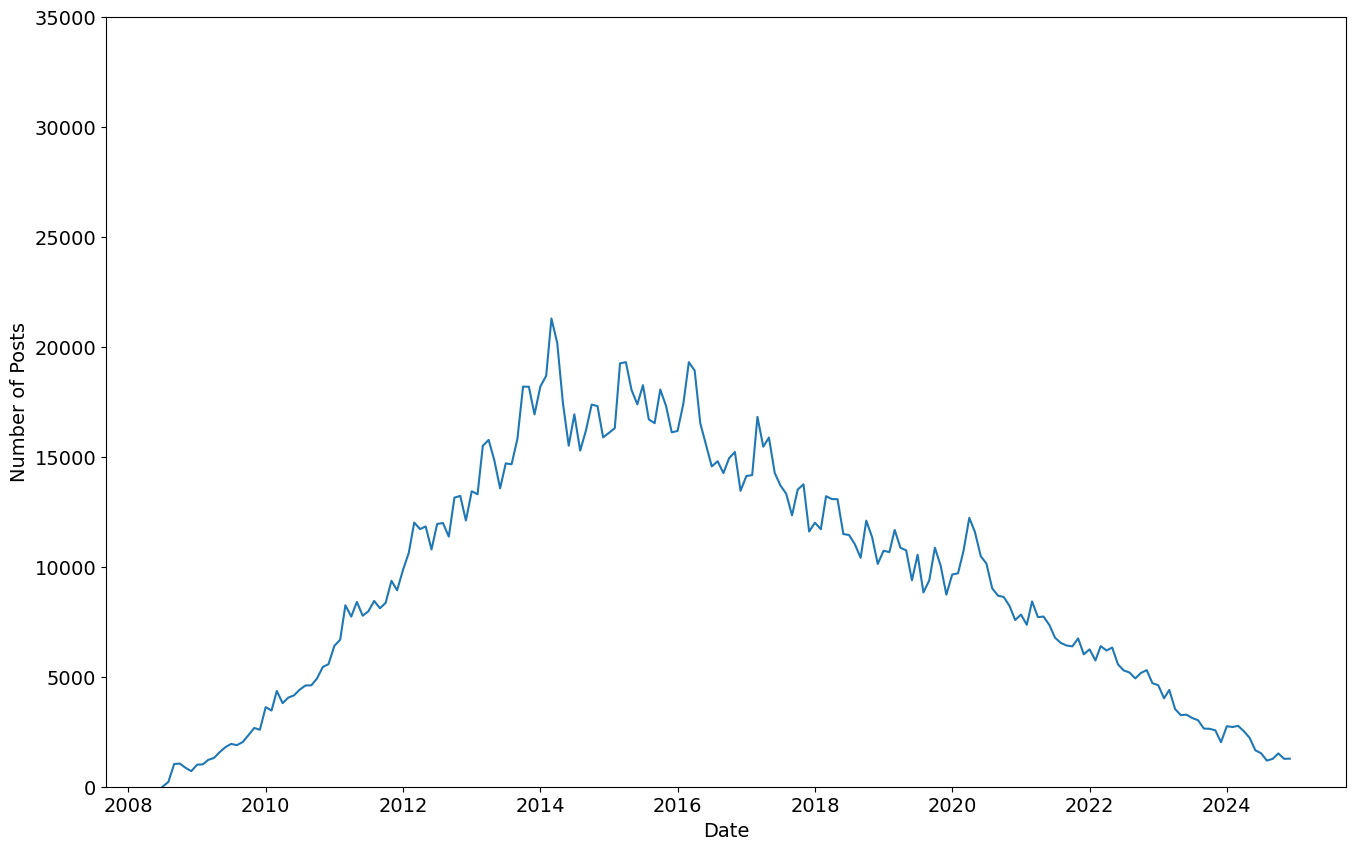

In [416]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_data.index, reshaped_data["java"])

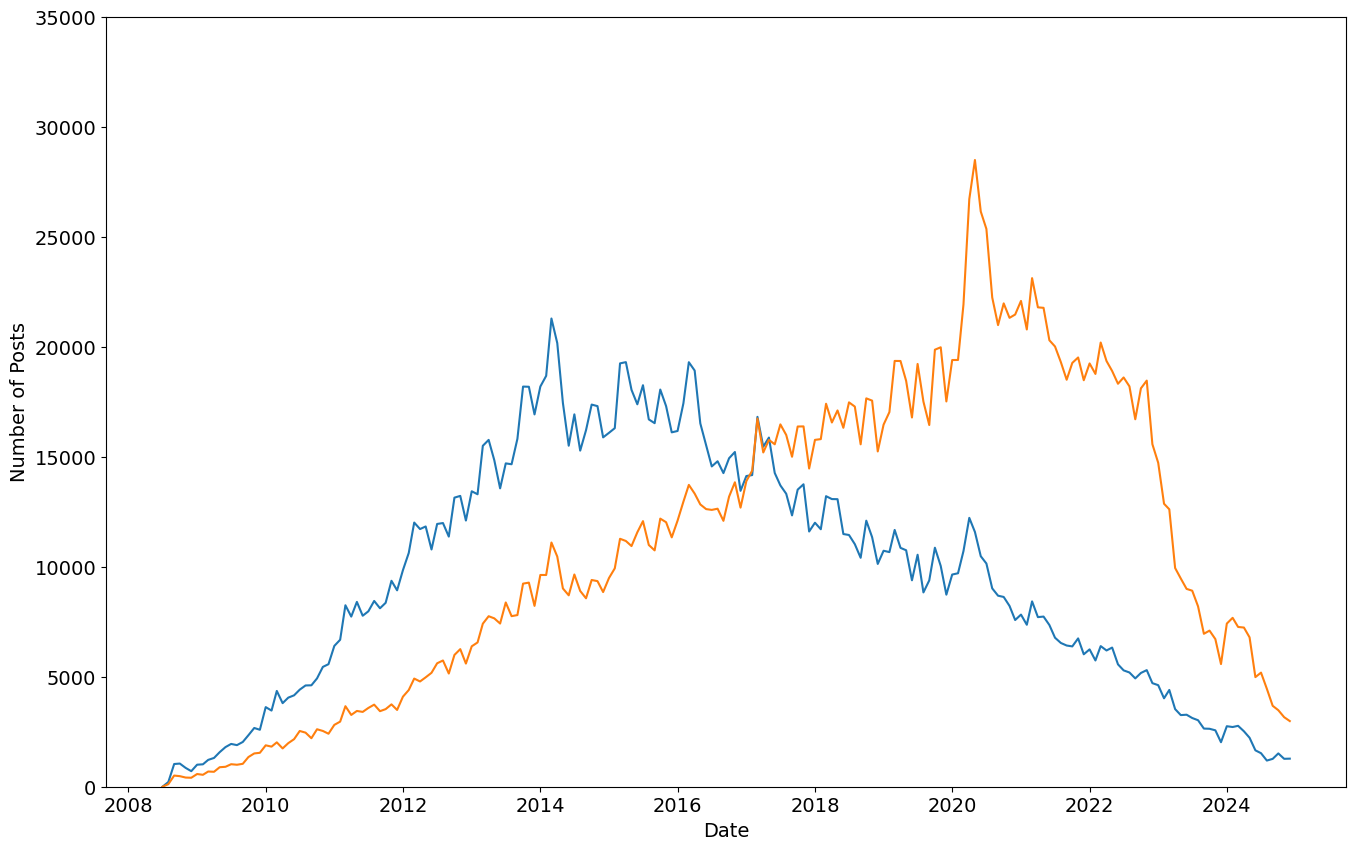

In [418]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_data.index, reshaped_data["java"])
plt.plot(reshaped_data.index, reshaped_data["python"])

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

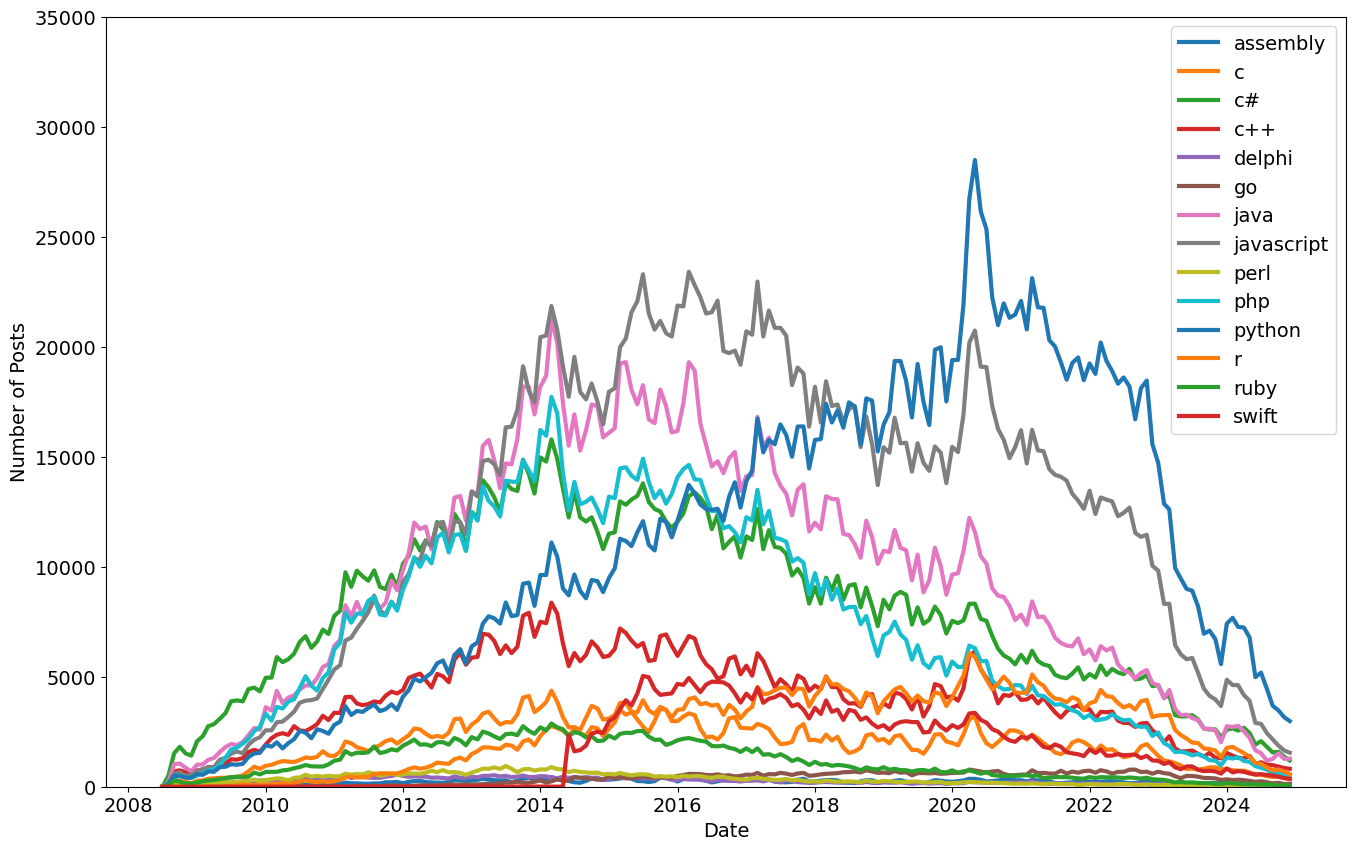

In [422]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
for column in reshaped_data.columns:
    plt.plot(reshaped_data.index, reshaped_data[column], linewidth=3, label = reshaped_data[column].name)

plt.legend(fontsize=14)

plt.show()

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

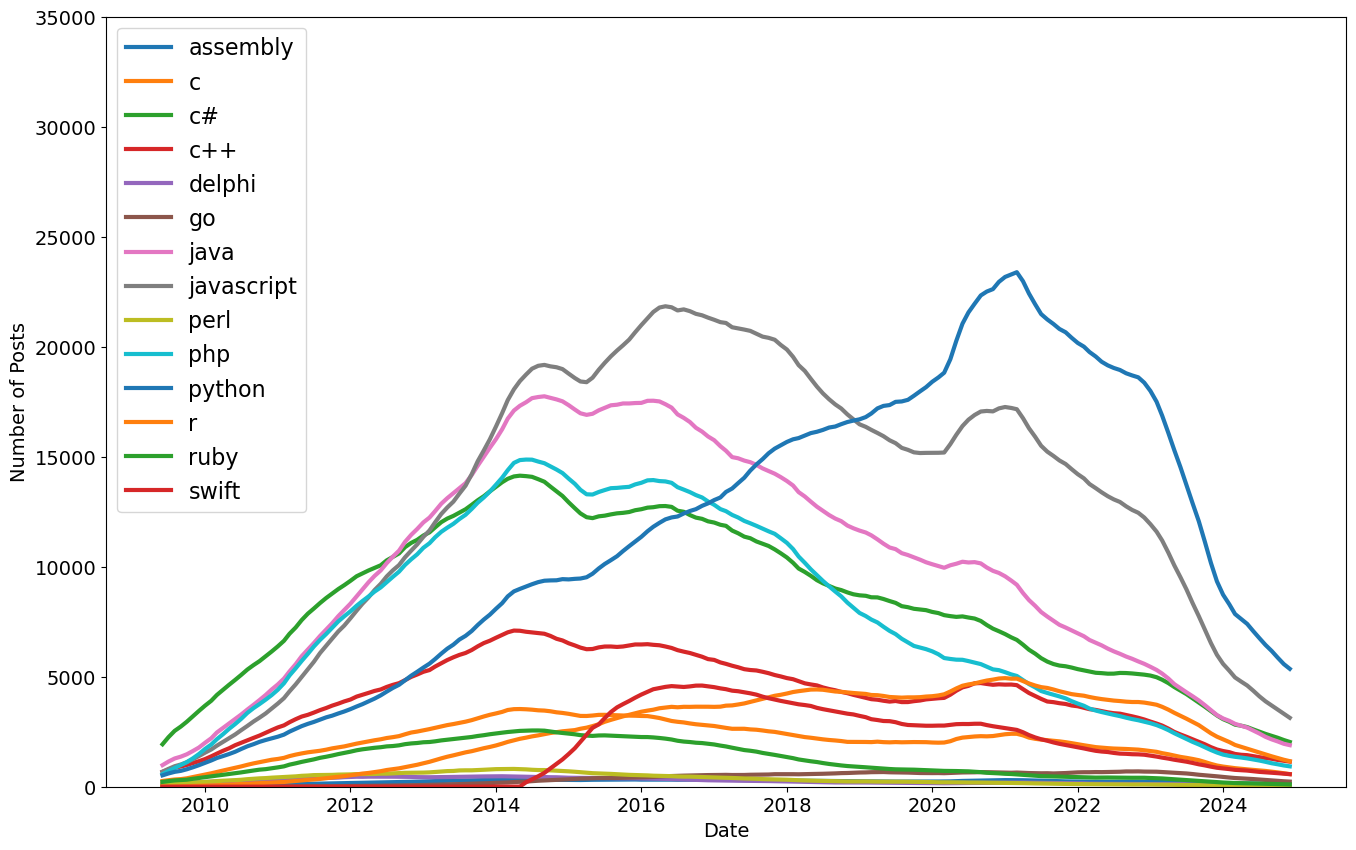

In [444]:
roll_df = reshaped_data.rolling(window=12).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
 
plt.legend(fontsize=16)

plt.show()